# MSDS 7331 - Lab One: Visualization and Data Processing

### Investigators
- [Matt Baldree](mailto:mbaldree@smu.edu?subject=lab1)
- [Tom Elkins](telkins@smu.edu?subject=lab1)
- [Austin Kelly](ajkelly@smu.edu?subject=lab1)
- [Murali Parthasarathy](mparthasarathy@smu.edu?subject=lab1)


<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Lab Instructions</h3>
    <p>You are to perform analysis of a data set: exploring the statistical summaries of the features,
visualizing the attributes, and making conclusions from the visualizations and analysis. Follow the
CRISP-DM framework in your analysis (you are not performing all of the CRISP-DM outline, only
the portions relevant to understanding and visualization). This report is worth 20% of the final
grade. Please upload a report (one per team) with all code used, visualizations, and text in a single
document. The format of the document can be PDF, *.ipynb, or HTML. You can write the report in
whatever format you like, but it is easiest to turn in the rendered iPython notebook.</p>
</div>

<a id='business_understanding'></a>
## Business Understanding
<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Business Understanding (<b>10 points total</b>)</h3>
    <ol><li>Describe the purpose of the data set you selected (i.e., why was this data collected in
the first place?).</li>
    <li>Describe how you would define and measure the outcomes from the
dataset. That is, why is this data important and how do you know if you have mined
useful knowledge from the dataset?</li>
    <li>How would you measure the effectiveness of a
good prediction algorithm? Be specific.</li></ol>
</div>

### 1. Purpose of Data Set
The data set chosen for lab 1 is the 2015 Washington DC Metro Crime inspired from a Kaggle data set found at https://www.kaggle.com/vinchinzu/dc-metro-crime-data. The data set was obtained by following the steps found on the [Using the Crime Map Application](http://mpdc.dc.gov/node/200622) page. This site allowed us to download all eight wards from 01/01/2015 to 12/31/2015 as an exported CSV files. These individual ward files were then merged together into a single file for our use. This data set contains 36,493 entries and 18 attributes that are both continuous and discrete. This satisfies the data set requirement for a minimum of 30,000 entries and 10 attributes which are both continuous and discrete. Further definition of this data set will be discussed in the [Data Understanding](#data_understanding) section.

![Ward Map](images/wards_small.png "Washington DC Wards") 
<p style='text-align: center;'>
Washington DC Metro Ward Map
</p>

The crime data is published by the Washington DC Metro police department daily (see below image) to provide their residents a clear picture of crime trends as they actually happen. The data is shared with its residents such as Advisory Neighborhood Commissions to help the police determine how to keep neighborhoods safe. The data is also analyzed to determine the effectiveness of current investments such as putting more officers on the streets, buying police more tools, and launching community partnerships, see [Washington DC Metro Police Department report](http://mpdc.dc.gov/publication/mpd-annual-report-2015) for more details.

![Ward Map](images/dc_2015_crime.tiff "Washington DC Year End Crime Data") 
<p style='text-align: center;'>
Washington DC Metro 2015 Year End Crime Data
</p>

### 2. Importance of the Data Set
This data set could be used to predict the number of violent and property crimes in police district given time of day, day of week, and other factors. This would allow the police department to appropriate adequate resources to each district to respond and possibly prevent the crimes.

In addition, this data set could be used to whether a crime at a location is violent or propery crime based on history of other crimes near this location. This would be valuable if a potential crime was reported but the reporter was unsure of the type of crime or if the crime reported was unusual for this location.

### 3. Measurement of Importance
The measurement of the importance would be to perform a validation on the machine learning model that was trained on the data set to predict the number of crimes that would be committed in a police district. If the crime prediction for a location was used, then the model would be trained and validated against crimes by location. The prediction error would be reported for both scenarios.

<a id="data_understanding"></a>
## Data Understanding

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Data Understanding (<b>80 points total</b>)</h3>
    <ol><li>[<b>10 points</b>] Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file.</li>
    <li>[<b>15 points</b>] Verify data quality: Explain any missing values, duplicate data, and outliers.
Are those mistakes? How do you deal with these problems? Be specific.</li>
    <li>[<b>10 points</b>] Give simple, appropriate statistics (range, mode, mean, median, variance,
counts, etc.) for the most important attributes and describe what they mean or if you
found something interesting. Note: You can also use data from other sources for
comparison. Explain the significance of the statistics run and why they are meaningful.</li>
    <li>[<b>15 points</b>] Visualize the most important attributes appropriately (at least 5 attributes).
Important: Provide an interpretation for each chart. Explain for each attribute why the
chosen visualization is appropriate.</li>
    <li>[<b>15 points</b>] Explore relationships between attributes: Look at the attributes via scatter
plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain
any interesting relationships.</li>
    <li>[<b>10 points</b>] Identify and explain interesting relationships between features and the class
you are trying to predict (i.e., relationships with variables and the target classification).</li>
    <li>[<b>5 points</b>] Are there other features that could be added to the data or created from
existing features? Which ones?</li></ol>
</div>



### 1. Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

In [1014]:
# Import the libraries we will need
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math

import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# Read in the crime data from the combined CSV file
dc = pd.read_csv('data/DC_Crime_2015.csv')

#### Information about Data Frame

The description of the imported CVS data reveals taht we imported all the columns. All columns do not have the same amount of data. All columns data types were not interpreted correctly. The correct data type could have been indicated upon import, but we will set column data types later in the notebook.

In [1015]:
# dataframe info
print dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36493 entries, 0 to 36492
Data columns (total 18 columns):
REPORT_DAT              36493 non-null object
SHIFT                   36493 non-null object
OFFENSE                 36493 non-null object
METHOD                  36493 non-null object
BLOCK                   36493 non-null object
DISTRICT                36446 non-null float64
PSA                     36445 non-null float64
WARD                    36493 non-null int64
ANC                     36493 non-null object
NEIGHBORHOOD_CLUSTER    36076 non-null object
BLOCK_GROUP             36379 non-null object
CENSUS_TRACT            36379 non-null float64
VOTING_PRECINCT         36480 non-null object
CCN                     36493 non-null int64
XBLOCK                  36493 non-null float64
YBLOCK                  36493 non-null float64
START_DATE              36493 non-null object
END_DATE                36241 non-null object
dtypes: float64(5), int64(2), object(11)
memory usage: 5.0+ 

#### Feature Summary Statistics

Summary statistics for the non object data types are shown below.

In [1016]:
# summary statistics
print dc.describe()

           DISTRICT           PSA          WARD  CENSUS_TRACT           CCN  \
count  36446.000000  36445.000000  36493.000000  36379.000000  3.649300e+04   
mean       3.697196    374.298395      4.421259   6211.275791  1.511937e+07   
std        1.947438    194.524001      2.339270   3146.217537  1.087825e+05   
min        1.000000    101.000000      1.000000    100.000000  6.155556e+06   
25%        2.000000    206.000000      2.000000   3400.000000  1.505885e+07   
50%        4.000000    401.000000      5.000000   7000.000000  1.511063e+07   
75%        5.000000    506.000000      6.000000   8904.000000  1.516497e+07   
max        7.000000    708.000000      8.000000  11100.000000  1.619697e+07   

              XBLOCK         YBLOCK  
count   36493.000000   36493.000000  
mean   399301.346694  137698.576414  
std      3113.115343    3424.503748  
min    390147.000000  127300.000000  
25%    397228.000000  136027.000000  
50%    398878.000000  137622.530000  
75%    401257.000000  

#### Example Record from Data Set

Below is a sample output from a single record to get a feel for the type of data.

In [1017]:
# print an example 
print dc.ix[1234]

REPORT_DAT                                 06/24/2015 23:10
SHIFT                                              MIDNIGHT
OFFENSE                                         THEFT/OTHER
METHOD                                               OTHERS
BLOCK                   600 - 699 BLOCK OF MORTON STREET NW
DISTRICT                                                  3
PSA                                                     302
WARD                                                      1
ANC                                                      1A
NEIGHBORHOOD_CLUSTER                              Cluster 2
BLOCK_GROUP                                        003200 3
CENSUS_TRACT                                           3200
VOTING_PRECINCT                                 Precinct 38
CCN                                                15095285
XBLOCK                                               398044
YBLOCK                                               140473
START_DATE                              

#### Field Definitions
The [Crime Definitions](http://crimemap.dc.gov/CrimeDefinitions.aspx) provides detail definitions of codes used in this data set. 

|Column|Data Type|Value Range|Description|Missing|
|:-----|:--------|:----------|:----------|:-----:|
|REPORT_DAT|Date/Time|01/01/2015 00:00:00 - 12/31/2015 23:59:59|The date/time the offense was *reported*|0|
|SHIFT|Nominal|Day = 0700-1500, Evening = 1500-2300, Midnight = 2300-0700|The duty shift that responded to the call|0|
|OFFENSE|Nominal|Various|The category of crime committed (from the Crime Definitions link above)|0|
|METHOD|Nominal|"OTHERS", "GUN", "KNIFE"|A qualifier to the Offense that flags special considerations, such as the use of a gun|0|
|BLOCK|Nominal|Varies|The street and block identifier|0|
|DISTRICT|Integer|1-7|The police district|47 (0.13%)|
|PSA|Integer|{1-7}(01-08}: 101-108,...,701-708|Police Service Area|48 (0.13%)|
|WARD|Integer|1-8|The political Ward identifier|0|
|ANC|Nominal|{1-8}{A-G}|Advisory Neighborhood Commission|0|
|NEIGHBORHOOD_CLUSTER|Nominal|"Cluster "{1-39}|Neighborhood identifier|417 (1.14%)|
|BLOCK_GROUP|Nominal|{CENSUS_TRACT}{space}{1-6}|Subdivision within a tract|114 (0.31%)
|CENSUS_TRACT|Integer|Discontinuous values between 100 and 11100|Land management tract identifier|114 (0.31%)|
|VOTING_PRECINCT|Nominal|"Precinct "{1-143}|Political subdivision|12 (0.03%)|
|CCN|Integer|Discontinuous values between 14151815 and 15403340|Criminal Complaint Number - unique to each report|0|
|XBLOCK|Ratio|min: 390,147; max: 407,806|Eastern coordinate of crime scene (meters)|0|
|YBLOCK|Ratio|min: 147,292; max: 127,300|Northern coordinate of crime scene (meters)|0|
|START_DATE|Date/Time|Varies|The earliest the crime *might* have been committed|0|
|END_DATE|Date/Time|Varies|The latest the crime *might* have been committed|252 (0.69%)|

Given that we have geo-physical coordinates, we believe we can impute some of the missing geo-political values (such as Police District).

### 2. Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Be specific.

#### Unique Data

- Block has 9,033 unique values indicating the street and block identifier. This value appears to be based on the CENSUS_TRACT variable, but with higher resolution. Mapping these unique values is time consuming and doesn't provide meaningful value for our QOI. Therefore, the column will be removed from the working data set. 
- Block Group has 450 unique values indicating the land management tract identifier. Mapping these unique values is time consuming and doesn't provide meaning value for our QOI. Therefore, the column will be removed from the working data set.

In [1018]:
print np.count_nonzero(dc['BLOCK'].unique())
dc.drop('BLOCK', axis=1, inplace=True)

print np.count_nonzero(dc['BLOCK_GROUP'].unique())
dc.drop('BLOCK_GROUP', axis=1, inplace=True)

9033
450


#### Missing Values Strategy

The strategy used for missing values is to ensure that each crime is associated with critical information. If any critical information is missing, then the row is deleted, otherwise an appropriate value will be imputed.

- The START_DATE and END_DATE are crime timestamp windows. START_DATE doesn't have any missing values. These values represent the span of time in which the crime *might* have been committed. There are a lot of missing values for the END_DATE field. For simplicity, END_DATE that have missing values, the START_DATE will be used. 
- If NEIGHBORHOOD_CLUSTER is missing, it will receive a 0 value which is not a valid cluster.
- If CENSUS_TRACK is missing, it will receive a 0 value which is not a valid tract.
- If VOTING_PRECINCT is missing, it will receive a 0 value which is not a valid precinct.
- If the PSA is missing, then compute mean XBlock/YBlock for each PSA. Estimate the PSA for the missing values based on proximity.  
- If the DISTRICT is missing, then compute the mean XBlock and YBlock values for each district. For each record missing a District value, compare the record's XBlock and YBlock to each District mean and report the district that is closest. Use that value to fill in the blank.

In [1019]:
# if END_DATE is NaN, then use START_DATE
dc['END_DATE'].fillna(dc['START_DATE'], inplace=True)

# if VOTING_PRECINCT is NaN, then set it to 0
dc['VOTING_PRECINCT'].fillna(0, inplace=True)

# if NEIGHBORHOOD_CLUSTER is NaN, then set it to 0
dc['NEIGHBORHOOD_CLUSTER'].fillna(0, inplace=True)

# if CENSUS_TRACT is NaN, then set it to 0
dc['CENSUS_TRACT'].fillna(0, inplace=True)

In [1020]:
#  Create a dataframe that holds the central location of each Police Service Area (PSA)
#  The PSAs are smaller than the Police Districts, so we should have better accuracy in identifying the associated PSA
#  The PSA ID contains the District ID, so we can impute the District from the PSA
psa_loc = pd.DataFrame(dc[['PSA','XBLOCK','YBLOCK']].groupby('PSA').median())

#  ---==< Estimate PSA membership based on proximity to each area's centroid >==---
def NearestPSA(myPSA,dX,dY):
    # Default to the current PSA ID
    nearestPSA = myPSA
    
    # Only operate on missing IDs
    if (pd.isnull(myPSA)):
        minDist = 9e99  # Set the initial closest distance to be a large value
        nearestPSA = 0
        
        # Loop through the records in the psa_loc dataframe
        for PSA_ID, PSA in psa_loc.iterrows():
            # Calculate the distance between the report and the current PSA
            thisDist = math.sqrt((dX - PSA['XBLOCK'])**2 + (dY - PSA['YBLOCK'])**2)
            
            # If this distance is smaller than the current minimum distance, update the minimum distance
            if (thisDist < minDist):
                minDist = thisDist # Replace the minimum distance with the current distance
                nearestPSA = PSA_ID # Remember which PSA this is related to
                
    # Return the ID for the closest PSA
    return [nearestPSA, int(nearestPSA / 100)]

#  Impute the missing PSA
dc['PSA_ID'] = 0
dc['DistrictID'] = 0
dc[['PSA_ID','DistrictID']] = list(map(NearestPSA,dc['PSA'],dc['XBLOCK'],dc['YBLOCK']))

#  Impute the missing District
#dc['DistrictID'] = list(map(NearestGroup,dc['DISTRICT'],dc['XBLOCK'],dc['YBLOCK']))
dc[dc['PSA'].isnull()]

,REPORT_DAT,SHIFT,OFFENSE,METHOD,DISTRICT,PSA,WARD,ANC,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,VOTING_PRECINCT,CCN,XBLOCK,YBLOCK,START_DATE,END_DATE,PSA_ID,DistrictID
2718,11/21/2015 02:20,MIDNIGHT,THEFT F/AUTO,OTHERS,NaN,NaN,1,1B,Cluster 2,3500.0,Precinct 37,15186009,397802.4100,139380.1700,11/20/2015 16:30,11/21/2015 01:45,304.0,3
2739,10/02/2015 20:09,EVENING,ROBBERY,OTHERS,NaN,NaN,1,1A,Cluster 2,2900.0,Precinct 42,15156178,397476.6400,140522.0200,09/30/2015 23:00,10/02/2015 20:09,409.0,4
3978,09/20/2015 05:42,MIDNIGHT,THEFT/OTHER,OTHERS,NaN,NaN,1,1B,Cluster 3,4400.0,Precinct 22,15148656,397330.0000,138792.0000,09/20/2015 00:15,09/20/2015 01:00,305.0,3
4210,10/01/2015 16:31,EVENING,THEFT/OTHER,OTHERS,NaN,NaN,1,1A,Cluster 2,2802.0,Precinct 41,15155505,397162.0000,140314.0000,10/01/2015 15:30,10/01/2015 16:15,302.0,3
4278,09/17/2015 12:58,DAY,THEFT/OTHER,OTHERS,NaN,NaN,1,1B,Cluster 2,3600.0,Precinct 36,15146848,397539.0000,139873.0000,09/17/2015 11:30,09/17/2015 12:58,304.0,3
7044,08/01/2015 21:00,EVENING,ASSAULT W/DANGEROUS WEAPON,KNIFE,NaN,NaN,2,2F,Cluster 8,10100.0,Precinct 129,15118338,397430.4227,137052.8900,08/01/2015 20:04,08/01/2015 20:05,101.0,1
7979,08/29/2015 18:44,EVENING,THEFT F/AUTO,OTHERS,NaN,NaN,2,2B,Cluster 6,5301.0,Precinct 15,15135356,396746.5200,137871.2700,08/26/2015 22:00,08/29/2015 18:20,208.0,2
8192,10/13/2015 15:02,EVENING,THEFT/OTHER,OTHERS,NaN,NaN,2,2F,Cluster 6,10100.0,Precinct 17,15162558,397001.5629,137532.6600,10/08/2015 16:30,10/08/2015 17:30,307.0,3
8285,11/10/2015 00:04,MIDNIGHT,THEFT/OTHER,OTHERS,NaN,NaN,2,2C,Cluster 8,5800.0,Precinct 129,15179343,397609.1100,136475.8700,11/09/2015 12:00,11/09/2015 12:02,101.0,1
8654,09/28/2015 11:41,DAY,THEFT/OTHER,OTHERS,NaN,NaN,2,2A,Cluster 5,10800.0,Precinct 2,15153585,395764.0000,136921.0000,09/27/2015 18:30,09/27/2015 20:00,207.0,2


#### Duplicate Data

- Four rows are duplicated in the data set. These will be removed.
- All other columns may be duplicated since there isn't a unique key column.

In [1021]:
# do we have duplicate rows?
print dc.duplicated().sum()

4


In [1022]:
# drop rows that are duplicated
dc.drop_duplicates(inplace=True)

#### Convert Data Frame Columns to Correct Data Type

All columns are converted to datetime, integer, or real data types. For VOTING_PRECINCT and NEIGHBORHOOD_CLUSTER, the prefix string is dropped leaving the integer identifier. For REPORT_DAT, START_DATE, and END_DATE, their time stamp was converted to a date time object. The remaining columns were converted to interger values. SHIFT, OFFENSE, METHOD, and ANC were mapped from the string values to integers.

<code>
shift_mapping = {'day':1, 'evening':2, 'midnight':3}
offense_mapping = {'theft/other':1, 'theft f/auto':2, 'burglary':3, 'assault w/dangerous weapon':4, 'robbery':5,
                  'motor vehicle theft':6, 'homicide':7, 'sex abuse':8, 'arson':9}
method_mapping = {'others':1, 'gun':2, 'knife':3}
anc_mapping = {'1B':1, '1D':2, '1A':3, '1C':4, '6E':5, '4C':6, '5E':7, '2B':8, '2D':9, '2F':10, '2C':11,
       '2E':12, '2A':13, '3C':14, '3E':15, '3B':16, '3D':17, '3F':18, '3G':19, '4A':20, '4B':21, '4D':22,
       '5A':23, '5D':24, '5C':25, '5B':26, '6A':27, '6C':28, '6B':29, '6D':30, '7D':31, '7C':32, '7E':33,
       '7B':34, '7F':35, '8A':36, '8B':37, '8C':38, '8D':39, '8E':40}
</code>


In [1023]:
# strip 'Precinct ' from VOTING_PRECINCT values
# http://stackoverflow.com/questions/13682044/pandas-dataframe-remove-unwanted-parts-from-strings-in-a-column
dc['VOTING_PRECINCT'] = dc['VOTING_PRECINCT'].apply(str).map(lambda x: x.lstrip('Precinct '))

# strip 'Cluster ' from NEIGHBORHOOD_CLUSTER values
dc['NEIGHBORHOOD_CLUSTER'] = dc['NEIGHBORHOOD_CLUSTER'].apply(str).map(lambda x: x.lstrip('Cluster '))

In [1024]:
# convert REPORT_DAT to datetime
dc['REPORT_DAT'] = pd.to_datetime(dc['REPORT_DAT'])

# convert SHIFT to int
shift_mapping = {'day':1, 'evening':2, 'midnight':3}
dc['SHIFT'] = dc['SHIFT'].str.lower().map(shift_mapping).astype('category')

# convert OFFENSE to numeric
# Python for Data Analysis, pg. 279
offense_mapping = {'theft/other':1, 'theft f/auto':2, 'burglary':3, 'assault w/dangerous weapon':4, 'robbery':5,
                  'motor vehicle theft':6, 'homicide':7, 'sex abuse':8, 'arson':9}
dc['OFFENSE_Code'] = dc['OFFENSE'].str.lower().map(offense_mapping).astype('category')

# convert METHOD to numeric
method_mapping = {'others':1, 'gun':2, 'knife':3}
dc['METHOD_Code'] = dc['METHOD'].str.lower().map(method_mapping).astype('category')

# convert DISTRICT to numeric
dc['DistrictID'] = dc['DistrictID'].astype(np.int64)

# convert PSA to numeric
dc['PSA_ID'] = dc['PSA_ID'].astype(np.int64)

# convert WARD to numeric
dc['WARD'] = dc['WARD'].astype(np.int64)

# convert ANC to numeric
anc_mapping = {'1B':1, '1D':2, '1A':3, '1C':4, '6E':5, '4C':6, '5E':7, '2B':8, '2D':9, '2F':10, '2C':11,
       '2E':12, '2A':13, '3C':14, '3E':15, '3B':16, '3D':17, '3F':18, '3G':19, '4A':20, '4B':21, '4D':22,
       '5A':23, '5D':24, '5C':25, '5B':26, '6A':27, '6C':28, '6B':29, '6D':30, '7D':31, '7C':32, '7E':33,
       '7B':34, '7F':35, '8A':36, '8B':37, '8C':38, '8D':39, '8E':40}
dc['ANC'] = dc['ANC'].str.upper().map(anc_mapping).astype('category')

# convert NEIGHBORHOOD_CLUSTER to numeric
dc['NEIGHBORHOOD_CLUSTER'] = dc['NEIGHBORHOOD_CLUSTER'].astype(np.int64)

# convert CENSUS_TRACT to numeric
dc['CENSUS_TRACT'] = dc['CENSUS_TRACT'].astype(np.int64)

# convert VOTING_PRECINCT to numeric
dc['VOTING_PRECINCT'] = dc['VOTING_PRECINCT'].astype(np.int64)

# convert CCN to numeric
dc['CCN'] = dc['CCN'].astype(np.int64)

# convert XBLOCK, YBLOCK to numeric
dc['XBLOCK'] = dc['XBLOCK'].astype(np.float64)
dc['YBLOCK'] = dc['YBLOCK'].astype(np.float64)

# convert START_DATE, END_DATE to dateime
dc['START_DATE'] = pd.to_datetime(dc['START_DATE'])
dc['END_DATE'] = pd.to_datetime(dc['END_DATE'])

print dc.info()
print
print dc.ix[1234]
print
print dc.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36489 entries, 0 to 36492
Data columns (total 20 columns):
REPORT_DAT              36489 non-null datetime64[ns]
SHIFT                   36489 non-null category
OFFENSE                 36489 non-null object
METHOD                  36489 non-null object
DISTRICT                36442 non-null float64
PSA                     36441 non-null float64
WARD                    36489 non-null int64
ANC                     36489 non-null category
NEIGHBORHOOD_CLUSTER    36489 non-null int64
CENSUS_TRACT            36489 non-null int64
VOTING_PRECINCT         36489 non-null int64
CCN                     36489 non-null int64
XBLOCK                  36489 non-null float64
YBLOCK                  36489 non-null float64
START_DATE              36489 non-null datetime64[ns]
END_DATE                36489 non-null datetime64[ns]
PSA_ID                  36489 non-null int64
DistrictID              36489 non-null int64
OFFENSE_Code            36489 non-null

#### Outliers

Thirty crimes were reported in 2015 which started before 2014. Six of the crimes started in 1915. Are these start dates in error or were these unsolved crimes recently solved through new technology advancements? Is it truly a 100-year-old cold case, or did the person simply enter the wrong century?

In [1025]:
print dc['START_DATE'][dc['START_DATE']<'1/1/2014'].count()
print sorted(dc['START_DATE'][dc['START_DATE']<'1/1/2014'])[:10]

30
[Timestamp('1915-03-18 16:00:00'), Timestamp('1915-08-30 06:00:00'), Timestamp('1915-09-17 18:00:00'), Timestamp('1915-10-10 22:30:00'), Timestamp('1915-10-16 21:03:00'), Timestamp('1915-10-17 21:00:00'), Timestamp('1997-12-15 17:00:00'), Timestamp('2000-04-23 20:00:00'), Timestamp('2001-05-21 19:00:00'), Timestamp('2005-03-12 19:28:00')]


#### New Features

Add new feature CRIME_TYPE to indicate if the crime was violent or property. This feature will be used for later prediction purposes.

In [1026]:
# add feature for crime type 1 = Violent, 2 = Property
violent_offense = [1, 2, 3, 4]
dc['CRIME_TYPE'] = np.where(dc['OFFENSE_Code'].isin(violent_offense), 1, 2)
dc['CRIME_TYPE'] = dc['CRIME_TYPE'].astype('category')

Add new feature AGE to indicate the timespan between the latest the crime could have been committed and earliest.

In [1027]:
# add age of crime END_DATE - START_DATE in seconds
dc['AGE'] = (dc['END_DATE'] - dc['START_DATE'])/np.timedelta64(1, 's')

Add a new feature TIME_TO_REPORT to indicate the timespan between the latest time the crime was committed and the time it was reported.

In [1028]:
# add time it took from crime to report it, REPORT_DAT - END_DATE in seconds
dc['TIME_TO_REPORT'] = (dc['REPORT_DAT'] - dc['END_DATE'])/np.timedelta64(1, 's')

### 3. Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.

#### Offense
The frequency of an offense was determined alonged with the rate for each offense given the published estimated population value of 672,228 (use the 'per 100,000' criterion). The odds for each offense type were also determined yielding the following insights:

- Homicide rate = (# Homicides) / (population / 100,000) = 162 / 6.72228 = 24.09.  Compare to published value (24). That gives us odds of being murdered: 24.09/100000 = 0.024%
- You are 16x more likely to get robbed than murdered.
- 30% of all crimes are 'Theft F/Auto' which is theft of items from within a vehicle. This stat reinforces the warning for people to take valuables or lock them in your trunk.

In [1029]:
#  Examine the frequency of types of crimes
print ' Total Offenses - Count'
print dc.CCN.count()
print ''
crime_rate = dc.groupby('OFFENSE')
print ' Offense Type - Count'
print crime_rate.CCN.count()
print '-------------------------------'
print ' Offense Rate per 100,000 '
print '-------------------------------'
print crime_rate.CCN.count() / 6.72228
print '-------------------------------'
print ' Odds of being a victim - by offense'
print '-------------------------------'
print crime_rate.CCN.count() / 672228.0


'''
Matt: Tom, is this below code required? There is an earlier mapping to CRIME_TYPE and that field can 
be used to One Hot Encode into appropriate variables.

#  Build a function that distinguishes Violent crimes from Property crimes
def MapViolentCrime(sOffense):
    sOffCode = sOffense[:2]
    if (sOffCode == "AR"):
        return 0
    elif (sOffCode == "AS"):
        return 1
    elif (sOffCode == "BU"):
        return 0
    elif (sOffCode == "HO"):
        return 1
    elif (sOffCode == "MO"):
        return 0
    elif (sOffCode == "RO"):
        return 1
    elif (sOffCode == "SE"):
        return 1
    else:
        return 0

#  Mark violent crimes versus property crimes
dc['Violent'] = list(map(MapViolentCrime,dc['OFFENSE']))
'''

 Total Offenses - Count
36489

 Offense Type - Count
OFFENSE
ARSON                            18
ASSAULT W/DANGEROUS WEAPON     2390
BURGLARY                       2534
HOMICIDE                        158
MOTOR VEHICLE THEFT            2794
ROBBERY                        3352
SEX ABUSE                       273
THEFT F/AUTO                  10970
THEFT/OTHER                   14000
Name: CCN, dtype: int64
-------------------------------
 Offense Rate per 100,000 
-------------------------------
OFFENSE
ARSON                            2.677663
ASSAULT W/DANGEROUS WEAPON     355.534134
BURGLARY                       376.955438
HOMICIDE                        23.503930
MOTOR VEHICLE THEFT            415.632791
ROBBERY                        498.640342
SEX ABUSE                       40.611221
THEFT F/AUTO                  1631.886800
THEFT/OTHER                   2082.626728
Name: CCN, dtype: float64
-------------------------------
 Odds of being a victim - by offense
-------------------

'\nMatt: Tom, is this below code required? There is an earlier mapping to CRIME_TYPE and that field can \nbe used to One Hot Encode into appropriate variables.\n\n#  Build a function that distinguishes Violent crimes from Property crimes\ndef MapViolentCrime(sOffense):\n    sOffCode = sOffense[:2]\n    if (sOffCode == "AR"):\n        return 0\n    elif (sOffCode == "AS"):\n        return 1\n    elif (sOffCode == "BU"):\n        return 0\n    elif (sOffCode == "HO"):\n        return 1\n    elif (sOffCode == "MO"):\n        return 0\n    elif (sOffCode == "RO"):\n        return 1\n    elif (sOffCode == "SE"):\n        return 1\n    else:\n        return 0\n\n#  Mark violent crimes versus property crimes\ndc[\'Violent\'] = list(map(MapViolentCrime,dc[\'OFFENSE\']))\n'

#### Offense by Police Shift

Looking at the below crosstab of Offense by Shift reveals the following insights:

- For 'motor vehicle theft', 47% of the crimes are reponded to by the day shifts. This fact is different from normal laymen's thinking that automobile theft occurs while people are sleeping.
- 81%, (.36 + .45) = .81, of burglaries are responded to by day and evening shifts. This makes sense that burglaries would occur while people are away from home. It would be interesting to note where the concentration of burglaries occurred.
- For 'arson', 50% of the crimes are responded to by midnight shift.
- For 'theft/other', 51% of the crimes are responded to by evening shift.
- 81% of all crimes are responded to by day and evening shifts. Do the police distributions match this stat?

In [1030]:
# shift = {'day':1, 'evening':2, 'midnight':3}

# https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
def percentConv(x):
    return x / float(sum(x))

print pd.crosstab(dc.OFFENSE, dc.SHIFT).apply(percentConv, axis=1)

SHIFT                              1         2         3
OFFENSE                                                 
ARSON                       0.277778  0.222222  0.500000
ASSAULT W/DANGEROUS WEAPON  0.220921  0.417573  0.361506
BURGLARY                    0.365036  0.451855  0.183110
HOMICIDE                    0.000000  0.000000  1.000000
MOTOR VEHICLE THEFT         0.468862  0.340014  0.191124
ROBBERY                     0.190632  0.436754  0.372613
SEX ABUSE                   0.282051  0.380952  0.336996
THEFT F/AUTO                0.455697  0.377940  0.166363
THEFT/OTHER                 0.364000  0.511929  0.124071


#### Method

The frequency of a method was determined alonged with the rate for each method given the published estimated population value of 672,228 (use the 'per 100,000' criterion). The odds for each method type were also determined yielding the following insights:

- It is 2x more likely a crime will be committed with a gun than a knife.
- Other method occurs 10x more than gun or knife. This method should be further broken down at time of capture.
- TODO: Are there any published values about gun-related crimes?

In [1031]:
print ' Total Methods - Count'
print dc.CCN.count()
print ''

method_rate = dc.groupby('METHOD')
print ' Method Type - Count'
print method_rate.CCN.count()
print '-------------------------------'
print ' Method Rate per 100,000 '
print '-------------------------------'
print method_rate.CCN.count() / 6.72228
print '-------------------------------'
print ' Odds of being a victim - by method'
print '-------------------------------'
print method_rate.CCN.count() / 672228.0

'''
Matt: Tom, is this below code required? We can One Hot Encode into appropriate variables.

#  Build a function to return the method type as individual categorical variables
def MapMethod(sMethod):
    if (sMethod == "GUN"):
        return [1,0]
    elif (sMethod == "KNIFE"):
        return [0,1]
    else:
        return [0,0]

dc['GunUsed'] = 0
dc['KnifeUsed'] = 0
dc[['GunUsed','KnifeUsed']] = list(map(MapMethod,dc['METHOD']))
'''

 Total Methods - Count
36489

 Method Type - Count
METHOD
GUN        2179
KNIFE      1165
OTHERS    33145
Name: CCN, dtype: int64
-------------------------------
 Method Rate per 100,000 
-------------------------------
METHOD
GUN        324.145974
KNIFE      173.304296
OTHERS    4930.618778
Name: CCN, dtype: float64
-------------------------------
 Odds of being a victim - by method
-------------------------------
METHOD
GUN       0.003241
KNIFE     0.001733
OTHERS    0.049306
Name: CCN, dtype: float64


'\nMatt: Tom, is this below code required? We can One Hot Encode into appropriate variables.\n\n#  Build a function to return the method type as individual categorical variables\ndef MapMethod(sMethod):\n    if (sMethod == "GUN"):\n        return [1,0]\n    elif (sMethod == "KNIFE"):\n        return [0,1]\n    else:\n        return [0,0]\n\ndc[\'GunUsed\'] = 0\ndc[\'KnifeUsed\'] = 0\ndc[[\'GunUsed\',\'KnifeUsed\']] = list(map(MapMethod,dc[\'METHOD\']))\n'

#### Offense by Method

Looking at the below crosstab of Offense by Method reveals that Method 'others' is 91% of all crimes. It is advisable that the crime reporting system further decompose this instance to provide better visibility into the method of the crime. Below are some other highlights:

- For 'homicide' crimes, a method of 'gun' was used 75% of the time.
- For 'assualt w/ dangerous weapon' crimes, a method of 'knife' was used 37% of the time.

In [1032]:
print pd.crosstab(dc.OFFENSE, dc.METHOD, margins=True)

METHOD                       GUN  KNIFE  OTHERS    All
OFFENSE                                               
ARSON                          0      0      18     18
ASSAULT W/DANGEROUS WEAPON   750    891     749   2390
BURGLARY                      39      7    2488   2534
HOMICIDE                     119     22      17    158
MOTOR VEHICLE THEFT            1      1    2792   2794
ROBBERY                     1249    211    1892   3352
SEX ABUSE                     12     21     240    273
THEFT F/AUTO                   2      0   10968  10970
THEFT/OTHER                    7     12   13981  14000
All                         2179   1165   33145  36489


In [1033]:
print pd.crosstab(dc.OFFENSE, dc.METHOD).apply(percentConv, axis=1)

METHOD                           GUN     KNIFE    OTHERS
OFFENSE                                                 
ARSON                       0.000000  0.000000  1.000000
ASSAULT W/DANGEROUS WEAPON  0.313808  0.372803  0.313389
BURGLARY                    0.015391  0.002762  0.981847
HOMICIDE                    0.753165  0.139241  0.107595
MOTOR VEHICLE THEFT         0.000358  0.000358  0.999284
ROBBERY                     0.372613  0.062947  0.564439
SEX ABUSE                   0.043956  0.076923  0.879121
THEFT F/AUTO                0.000182  0.000000  0.999818
THEFT/OTHER                 0.000500  0.000857  0.998643


#### Crime by Weekday
Looking at the below crosstab of type of Crime by Weekday reveals the following insight:

- No arson crimes occurred on Wednesday.
- Saturday is peak for motor vehicle theft, robberies, and homicides crimes.
- Wednesday is peak for burglary.

In [1034]:
# 0 = Monday, 6 = Sunday

# set index to the start of the crime
dc_idx = dc.set_index('START_DATE')
print pd.crosstab(dc.OFFENSE, dc_idx.index.weekday, colnames=['Day of Week'], margins=True)
print ''
print pd.crosstab(dc.OFFENSE, dc_idx.index.weekday, colnames=['Day of Week']).apply(percentConv, axis=1)

Day of Week                    0     1     2     3     4     5     6    All
OFFENSE                                                                    
ARSON                          2     4     0     4     1     4     3     18
ASSAULT W/DANGEROUS WEAPON   311   336   314   315   325   392   397   2390
BURGLARY                     395   404   436   351   422   290   236   2534
HOMICIDE                      24    19    19    21    22    29    24    158
MOTOR VEHICLE THEFT          376   339   393   359   444   448   435   2794
ROBBERY                      454   433   496   485   448   536   500   3352
SEX ABUSE                     36    38    25    40    43    42    49    273
THEFT F/AUTO                1414  1477  1518  1492  1786  1787  1496  10970
THEFT/OTHER                 1965  2073  2036  2026  2259  1937  1704  14000
All                         4977  5123  5237  5093  5750  5465  4844  36489

Day of Week                        0         1         2         3         4  \
OFFENSE

#### Age of Crime
The crime data provide an estimated start date and end date for range when the crime might have been committed. Summary statistics for AGE reveal that there are outliers. Data greater than two standard deviations away were removed and summary statistics were recalculated. This output reveals the following:

- Average crime occured within a 33 hr period
- 25% of the crimes occurred within a 6 min period
- 50% of the crimes occurred within a 50 min period
- 75% of the crimes occurred within a 7 hr period


In [1040]:
# hours
data = dc['AGE'] / 3600

print data.describe()
print ''

# exclude data two std away from mean
#http://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-dataframe
print (data[~(np.abs(data - data.mean())>(2*data.std()))]).describe()

count     36489.000000
mean        170.696958
std       10334.903462
min         -21.500000
25%           0.100000
50%           0.833333
75%           7.000000
max      876975.000000
Name: AGE, dtype: float64

count    36473.000000
mean        33.490032
std        366.586870
min        -21.500000
25%          0.100000
50%          0.833333
75%          7.000000
max      17523.000000
Name: AGE, dtype: float64


#### Time to Report a Crime
The crime data provide a report date along with an estimated end date for the crime might. The timespan between these two columns was stored in TIME_TO_REPORT field in seconds. Summary statistics for TIME_TO_REPORT reveal that there are outliers. Data greater than two standard deviations away were removed and summary statistics were recalculated. This output reveals the following:

- Average report time for a crime is 29 hrs.
- 25% of the crimes get reported within a 16 minutes.
- 50% of the crimes occurred within a 1.1 hrs.
- 75% of the crimes occurred within a 3.4 h days.

In [1039]:
# hours
data = dc['TIME_TO_REPORT'] / 3600

print data.describe()
print ''

# exclude data two std away from mean
print (data[~(np.abs(data - data.mean())>(2*data.std()))]).describe()

count     36489.000000
mean         66.420186
std        4705.966240
min       -2230.916667
25%           0.266667
50%           1.100000
75%           3.400000
max      876936.000000
Name: TIME_TO_REPORT, dtype: float64

count    36475.000000
mean        29.041400
std        216.935906
min      -2230.916667
25%          0.266667
50%          1.100000
75%          3.400000
max       8913.266667
Name: TIME_TO_REPORT, dtype: float64


### 4. Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.

#### guidance
which day has the highest crimes? which day has the lowest?
boxplot of crime type

boxplot of offense
boxplot of method

boxplot of shifts

line plots of offense over days

### 5. Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

#### guidance

* Scatter plot of Method versus Age (are gun-/knife-related crimes dealt with faster than other methods?)
* Plot violent crimes versus age (are violent crimes dealt with faster than property crimes? - hope the answer is 'yes')
* Boxplot of Age versus PSA - are certain police areas more responsive than others?
* (unknown plot) of Offense versus Ward or Voting Precinct - are certain political areas more likely to have a crime


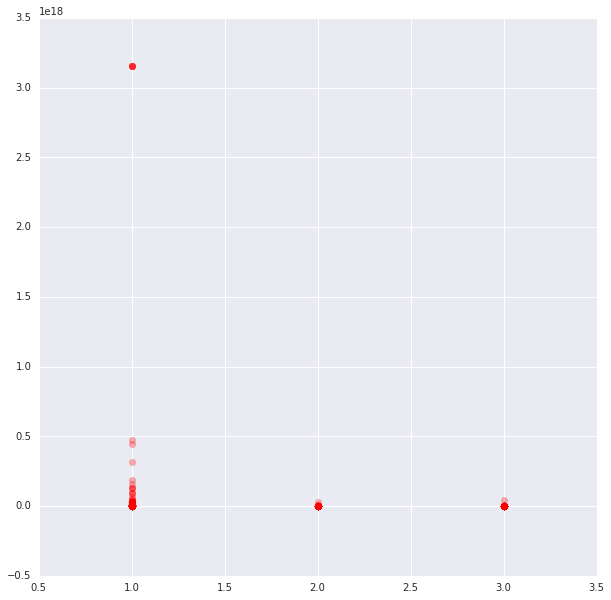

In [749]:
# Plot of Method versus Age
plt.figure(figsize=(10,10))
plt.scatter(dc['METHOD_Code'], dc['AGE'], s=50, alpha=0.3, color='r', lw=0)
plt.show()

### 6. Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

#### guidance

### 7. Are there other features that could be added to the data or created from existing features? Which ones?

#### New Features
1. Dummy variables are required to indicate if the crime was a violent or property category. These variables would then be used to train a machine learning regression model.
2. It would be nice to have the number of police deployed to a police ward for a shift to see if their numbers are correlated with crimes and their types.
3. It would be nice to have the police improvement campaigns and dollars by ward to determine if these improvements are correlated with crimes and their types.
4. It would be nice if we could get publically-available data for the cases or CCN (perpetrator information, victim demographics, etc.)

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>Exceptional Work (<b>10 points total</b>)</h3>
    <ul><li>You have free reign to provide additional analyses.</li>
    <li>One idea: implement dimensionality reduction, then visualize and interpret the results.</li></ul>
</div>

### Coordinates (XBLOCK, YBLOCK)
One obvious visualization tool would be to plot the geo-spatial relationship of the data, and, fortunately, this dataset provides the *approximate* location of the crime (presumably to preserve the privacy of the victim(s)) in grid coordinates (XBLOCK = East offset from the "Origin"; YBLOCK = North offset from the "Origin").  The question is, where is that Origin?

![Identity of Coordinate Origin](images/Coordinates.png "Origin for Location Coordinates")
<p style='text-align:center'>(*Screen capture of description of coordinate origin*)</p>

On the download page for the datasets, next to the "Map Coordinates" field selector, there is a description of the origin, which states that the values are in the Maryland State Plane, NAD 83 map projection.  Further research led to a web page that defined the [Maryland coordinate system](http://www.mgs.md.gov/geology/maryland_coordinate_system.html "Maryland State Coordinate System")

The coordinate system is a Lambert conformal conical projection with two standard parallels (latitudes). This attempts to reduce the distortion of trying to map a flat plane on a curved surface.  With the coordinate system defined, we can then reverse the projection and re-project to a different system that can be used with other mapping/GIS tools.  The transformation methodology came from the National Geospatial Intelligence Agency (NGA), but a more concise explanation of the method was provided by this website: http://www.linz.govt.nz/data/geodetic-system/coordinate-conversion/projection-conversions/lambert-conformal-conic-geographic 

In order to do the coordinate transformations, we need to get several parameters set up first.

|Parameter|Description|Value|
|:--------|:----------|:----|
|a|Semi-major axis of reference ellipsoid (meters)|6378137 (Maryland uses the GRS80 reference)|
|f|Ellipsoidal flattening|1/298.257222101 (GRS80)|
|&theta;<sub>1</sub>|Latitude of first standard parallel (degrees)|38.3 (38&deg; 18' from Maryland definition)|
|&theta;<sub>2</sub>|Latitude of second standard parallel (degrees)|39.45 (39&deg; 27' from Maryland definition)|
|&theta;<sub>0</sub>|Origin Latitude (degrees)|37.66667 (North 37&deg; 40' from Maryland definition)|
|&lambda;<sub>0</sub>|Origin Longitude (degrees)|-81.52918855 (West 81&deg; 31' 45.07877" from Maryland definition)|
|N<sub>0</sub>|False Northing (meters)|0.0 (from Maryland definition)|
|E<sub>0</sub>|False Easting (meters)|400,000 (from Maryland definition)|

From these, we can derive the projection constants

|Constant|Derivation|Value|
|-------|-----------|-----|
|e      |$\sqrt{2f - f^2}$ | 0.081819191|
|m<sub>i</sub>|$\frac{\cos \theta_i}{\sqrt{1-e^2\sin^2 \theta_i}}$|m<sub>1</sub>=0.785787341<br>m<sub>2</sub>=0.773225009|
|t<sub>i</sub>|$\frac{\tan \left[(\frac{\pi}{4})-(\frac{\theta_i}{2})\right]}{\left(\frac{1-e\sin\theta_i}{1+e\sin\theta_i}\right)^\frac{e}{2}}$|t<sub>0</sub>=0.493354296<br>t<sub>1</sub>=0.486512044<br>t<sub>2</sub>=0.474178631|
|n      |$\frac{\ln m_1 - \ln m_2}{\ln t_1 - \ln t_2}$|0.627634132|
|F      |$\frac{m_1}{n(t_1)^n}$|1.967837417|
|&rho;<sub>0</sub>  |$a F t_0^n$|8055622.737|

Now, for each point (i) in our dataset, we must perform the following steps:
1. Adjust the North offset using the false northing - our false northing is 0, so this step is skipped
2. Adjust the East offset using the false easting: $E_i' = E_i - E_0$
3. $\rho_i' = \sqrt{(E_i')^2 + (\rho_0-N_i)^2}$
4. $t_i'= \left(\frac{\rho_i'}{a F}\right)^\frac{1}{n}$
5. $\gamma_i' = \tan^{-1}\left(\frac{E_i'}{\rho_0-N_i}\right)$
6. $\lambda_i = \frac{\gamma_i'}{n}+\lambda_0$ (This is the longitude of the location
7. The calculation for latitude is iterative.
 1. $\theta_{i0} = \frac{\pi}{2}-2\tan^{-1}(t_i')$ (This is our initial estimate of latitude)
 2. $\theta_{i,j} = \frac{\pi}{2}-2\tan^{-1}\left[t_i'\left(\frac{1-e\sin\theta_{i,j-1}}{1+e\sin\theta_{i,j-1}}\right)\right]$ (We use the previous estimate to create a new estimate)
 3. Repeat the previous step until the difference in estimates is negligible (this typically takes three iterations)
8. $\theta_i$ is our estimate of the latitude for the location


In [750]:
#
#  ---==< Establish some functions and classes for geodetic coordinate transformations >==---
import math

#  ---==< Build a class that handles generic reference ellipsoid parameters >==---
class refEllipsoid:
    #  a = Equatorial radius (meters)
    #  f = Flattening (the degree to which the polar radius is compressed compared to the equatorial radius)
    #  b = Polar radius (meters): f = (a-b)/a; af = a-b; af - a = -b; b = a - af = a(1-f)
    #  e2 = First eccentricity squared: 1 − b2/a2 = 2f − f2
    #  e = First eccentricity
    #  p2 = Second eccentricity squared: a2/b2 − 1 = f(2 − f)/(1 − f)^2
    def __init__(self, equator, flattening):
        #  Provided
        self.a = float(equator)
        self.f = 1.0/float(flattening)
        
        #  Derived
        self.b = self.a * (1.0 - self.f)
        self.e2 = (2.0 * self.f) - self.f**2
        self.e = math.sqrt(self.e2)
        self.p2 = (self.a**2 / self.b**2) - 1.0

#  ---==< Create Ellipsoids for the GRS80 (origin) and WGS84 (destination) systems >==---
GRS80 = refEllipsoid(6378137.0,298.257222100882711)  #  Define the Geodetic Reference System 1980 (GRS80) ellipsoid
WGS84 = refEllipsoid(6378137.0,298.257223563)  #  Define the World Geodetic Survey 1984 (WGS84) ellipsoid

#  ---==< Generic function to convert individual angular components to floating-point degrees >==---
def DMS(degrees, minutes, seconds):
    sign = 1.0
    if degrees < 0:
        sign = -1.0
    return sign * (math.fabs(float(degrees)) + (float(minutes) / 60.0) + (float(seconds) / 3600.0))

#  ---==< Build a class to store the origin of a coordinate system >==---
class coordOrigin:
    origin = {'lat':0.0, 'lon': 0.0}
    parallel = {1:0.0, 2:0.0}
    false = {'n':0.0, 'e':0.0}
                        
    def __init__(self,latOrigin,lonOrigin,parallel1,parallel2,northing,easting):
        self.origin['lat'] = math.radians(latOrigin)
        self.origin['lon'] = math.radians(lonOrigin)
        self.parallel[1] = math.radians(parallel1)
        self.parallel[2] = math.radians(parallel2)
        self.false['n'] = float(northing)
        self.false['e'] = float(easting)
        
#  ---==< Set the origin for the Maryland state coordinate system >==---
#  Origin Latitude = 37 40 0; Longitude = -81 31 45.07877
#  Central meridian = -77 0 0
#  First parallel = 38 18 0; Second parallel = 39 27 0
#  False Northing = 0; False Easting = 400000

MD = coordOrigin(DMS(37,40,0),DMS(-77,0,0),DMS(38,18,0),DMS(39,27,0),0,400000)

#  ---==< Build a class to handle Lambert conformal conical projections >==---
class Lambert:
    def __init__(self):
        self.m1 = Lambert._m(MD.parallel[1])
        self.m2 = Lambert._m(MD.parallel[2])
        self.t0 = Lambert._t(MD.origin['lat'])
        self.t1 = Lambert._t(MD.parallel[1])
        self.t2 = Lambert._t(MD.parallel[2])
        self.n = (math.log(self.m1) - math.log(self.m2))/(math.log(self.t1)-math.log(self.t2))
        self.F = self.m1 / (self.n * self.t1**self.n)
        self.p0 = GRS80.a * self.F * self.t0**self.n
        
    @staticmethod
    def _m(parallel):
        return math.cos(float(parallel)) / math.sqrt(1.0 - (GRS80.e2 * math.sin(float(parallel))**2))

    @staticmethod
    def _t(parallel):
        return math.tan((math.pi / 4.0) - (float(parallel) / 2.0)) / ((1 - (GRS80.e * math.sin(float(parallel)))) / (1 + (GRS80.e * math.sin(float(parallel)))))**(GRS80.e / 2.0)
        
Projection = Lambert()

#  ---==< Create a function to transform Lambert conical offsets to Geodetic coordinates >==---
def transform(ptEast, ptNorth):
    Nprime = ptNorth - MD.false['n']
    Eprime = ptEast - MD.false['e']
    Pprime = math.sqrt(Eprime**2 + (Projection.p0 - Nprime)**2)
    if (Projection.n < 0):
        Pprime = 0 - Pprime
    Tprime = (Pprime/(WGS84.a * Projection.F))**(1.0/Projection.n)
    Gprime = math.atan(Eprime/(Projection.p0 - Nprime))
    Projection.Longitude = math.degrees((Gprime / Projection.n) + MD.origin['lon'])
    oldLat = 0.0
    newLat = (math.pi/2.0) - 2.0 * math.atan(Tprime)
    while (math.fabs(newLat - oldLat) > 1.0e-10):
        oldLat = newLat
        newLat = (math.pi/2.0) - (2.0 * math.atan(Tprime * ((1.0 - WGS84.e * math.sin(oldLat))/(1.0 + WGS84.e * math.sin(oldLat)))**(GRS80.e/2.0)))
    Projection.Latitude = math.degrees(newLat)
    return [Projection.Latitude, Projection.Longitude]

#
#  Test the transformation equations.
#  According to the NGA tool 'GeoTrans', the Lambert coordinates 397,229; 138,975 transform to Latitude 38.91864, Longitude -77.03195.
print transform(397229,138975)

[38.91864018648467, -77.03195297253015]


In [751]:
# ---==< Create a Latitude and Longitude field, then populate them by transforming the coordinates >==---
dc['Latitude'] = -9999.9999
dc['Longitude'] = -9999.9999
dc[['Latitude','Longitude']] = list(map(transform,dc['XBLOCK'],dc['YBLOCK']))

dc

,REPORT_DAT,SHIFT,OFFENSE,METHOD,DISTRICT,PSA,WARD,ANC,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,...,DistrictID,OFFENSE_Code,METHOD_Code,CRIME_TYPE,AGE,Violent,GunUsed,KnifeUsed,Latitude,Longitude
0,2015-03-04 12:05:00,1,THEFT/OTHER,OTHERS,3.0,305.0,1,1,3,4300,...,3,1,1,1,2.678580e+15,0,0,0,38.918640,-77.031953
1,2015-01-22 09:00:00,1,THEFT F/AUTO,OTHERS,4.0,408.0,1,2,2,2701,...,4,2,1,1,1.768800e+14,0,0,0,38.934826,-77.039955
2,2015-01-03 21:20:00,2,THEFT/OTHER,OTHERS,3.0,302.0,1,3,2,3000,...,3,1,1,1,6.000000e+11,0,0,0,38.929513,-77.032731
3,2015-01-05 12:44:00,1,THEFT/OTHER,OTHERS,3.0,306.0,1,1,3,3400,...,3,1,1,1,1.449000e+15,0,0,0,38.922580,-77.019719
4,2015-01-20 07:01:00,1,THEFT F/AUTO,OTHERS,3.0,302.0,1,3,2,3000,...,3,2,1,1,7.194000e+13,0,0,0,38.928635,-77.029708
5,2015-01-20 06:38:00,3,BURGLARY,OTHERS,3.0,305.0,1,1,3,3500,...,3,3,1,1,7.560000e+13,0,0,0,38.918768,-77.023893
6,2015-01-20 11:30:00,1,ASSAULT W/DANGEROUS WEAPON,OTHERS,3.0,304.0,1,1,2,3600,...,3,4,1,1,1.140000e+12,1,0,0,38.922424,-77.028876
7,2015-01-20 12:00:00,1,THEFT/OTHER,OTHERS,4.0,408.0,1,2,2,2701,...,4,1,1,1,8.820000e+13,0,0,0,38.935881,-77.036459
8,2015-01-01 23:48:00,3,ROBBERY,GUN,3.0,305.0,1,1,3,4400,...,3,5,2,2,6.000000e+10,1,1,0,38.919462,-77.025035
9,2015-01-04 01:28:00,3,THEFT F/AUTO,OTHERS,3.0,304.0,1,1,2,3700,...,3,2,1,1,1.260000e+13,0,0,0,38.924116,-77.035347


### Visualization - Map
After transforming the coordinates to Geodetic (Latitude/Longitude) we can plot the locations with a mapping/GIS tool.  In this example, we used a tool developed by Mercury Solutions, Inc. (Tom Elkins' company) that plots multiple tactical data sources.
![Crime data on map](images/Data_on_Map.png "Crime locations on DC Map")

### Data By Geo-Political Identifiers
#### Political Ward
![Crimes by Ward](images/CrimesByWard.png "Crimes by Ward")
#### Police District
![Crimes by Police District](images/DistrictBorderOverlay.png "Crimes by Police District")
<p style='text-align:center'>Police District Map from http://mpdc.dc.gov/sites/default/files/dc/sites/mpdc/page_content/images/districtmap_2012.jpg
Modified in PowerPoint to remove the background color, and resized to fit over the data plot</p>
#### Advisory Neighborhood Commission
![Crimes by ANC](images/CrimesByANC.png "Crimes by ANC")


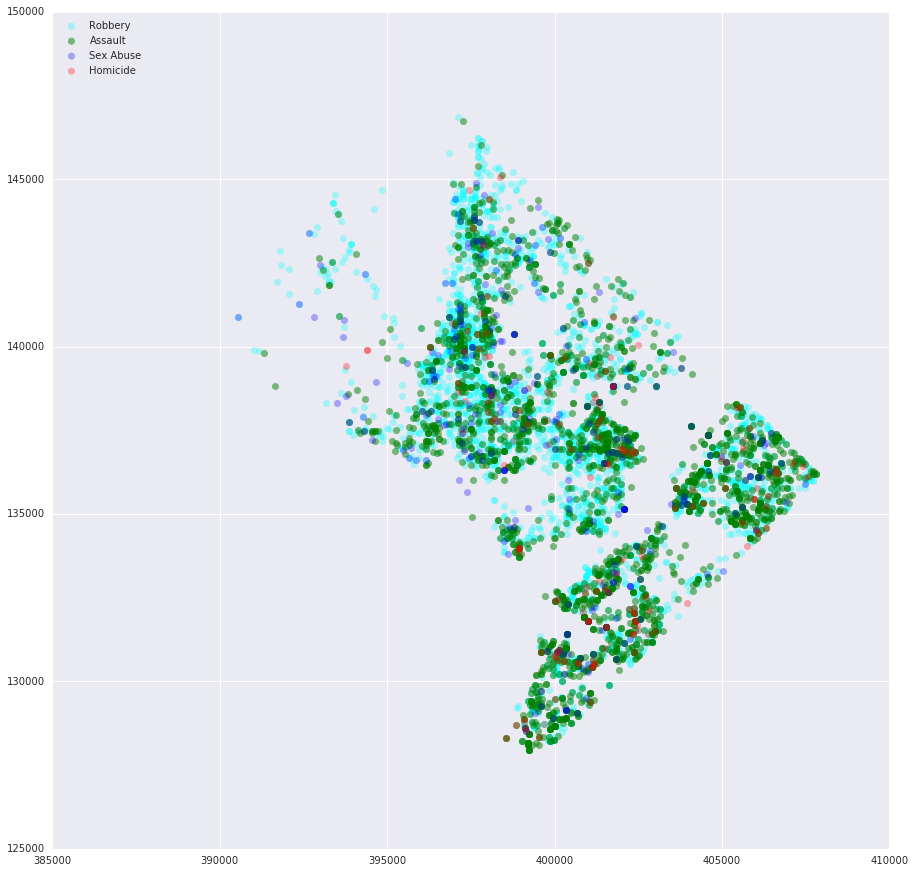

In [752]:
# Plot of violent crimes
plt.figure(figsize=(15,15))
plt.scatter(dc['XBLOCK'][dc['OFFENSE']=='ROBBERY'], dc['YBLOCK'][dc['OFFENSE']=='ROBBERY'], s=50, alpha=0.3, color=[0.0,1.0,1.0], lw=0, label='Robbery')
plt.scatter(dc['XBLOCK'][dc['OFFENSE']=='ASSAULT W/DANGEROUS WEAPON'], dc['YBLOCK'][dc['OFFENSE']=='ASSAULT W/DANGEROUS WEAPON'], s=50, alpha=0.5, color='g', lw=0, label='Assault')
plt.scatter(dc['XBLOCK'][dc['OFFENSE']=='SEX ABUSE'], dc['YBLOCK'][dc['OFFENSE']=='SEX ABUSE'], s=50, alpha=0.3, color='b', lw=0, label='Sex Abuse')
plt.scatter(dc['XBLOCK'][dc['OFFENSE']=='HOMICIDE'], dc['YBLOCK'][dc['OFFENSE']=='HOMICIDE'], s=50, alpha=0.3, color='r', lw=0, label='Homicide')
plt.legend(loc='upper left')
plt.show()